In [1]:
import pandas as pd
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt

In /Users/chungleu@uk.ibm.com/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/chungleu@uk.ibm.com/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/chungleu@uk.ibm.com/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/chungleu@uk.ibm.com/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor rele

# Load Dataset

In [11]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE


In [4]:
penguins.isna().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [29]:
penguins.dropna(inplace = True)

In [6]:
penguins.shape

(333, 7)

In [30]:
p_features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
p_features

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
...,...,...,...,...,...
335,55.1,16.0,230.0,5850.0,MALE
337,48.8,16.2,222.0,6000.0,MALE


In [31]:
p_features = pd.get_dummies(p_features, 'sex')
p_features

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1
6,38.9,17.8,181.0,3625.0,1,0
7,39.2,19.6,195.0,4675.0,0,1
...,...,...,...,...,...,...
335,55.1,16.0,230.0,5850.0,0,1
337,48.8,16.2,222.0,6000.0,0,1


In [32]:
p_target = penguins[['species']]
p_target

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie
6,Adelie
7,Adelie
...,...
335,Gentoo
337,Gentoo


In [33]:
X_train, X_test, y_train, y_test = train_test_split(p_features, p_target, random_state=123)
X_train.shape

(249, 6)

In [34]:
X_test.shape

(84, 6)

# Instantiate Classifier

In [35]:
clf = DecisionTreeClassifier(
    # min_samples_split=3, min_samples_leaf=2, max_depth=3 # Optional hyper-params
)

In [36]:
model = clf.fit(X_train, y_train)

# Represent Our Tree

In [38]:
text_representation = tree.export_text(clf)

In [40]:
print(text_representation)

|--- feature_2 <= 206.00
|   |--- feature_0 <= 44.65
|   |   |--- feature_1 <= 16.65
|   |   |   |--- feature_0 <= 39.50
|   |   |   |   |--- class: Adelie
|   |   |   |--- feature_0 >  39.50
|   |   |   |   |--- class: Chinstrap
|   |   |--- feature_1 >  16.65
|   |   |   |--- class: Adelie
|   |--- feature_0 >  44.65
|   |   |--- feature_3 <= 4100.00
|   |   |   |--- class: Chinstrap
|   |   |--- feature_3 >  4100.00
|   |   |   |--- feature_1 <= 16.45
|   |   |   |   |--- class: Gentoo
|   |   |   |--- feature_1 >  16.45
|   |   |   |   |--- feature_0 <= 48.40
|   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |--- class: Chinstrap
|   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |--- class: Adelie
|   |   |   |   |--- feature_0 >  48.40
|   |   |   |   |   |--- class: Chinstrap
|--- feature_2 >  206.00
|   |--- feature_1 <= 17.65
|   |   |--- class: Gentoo
|   |--- feature_1 >  17.65
|   |   |--- feature_1 <= 19.20
|   |   |   |--- class: Adelie
| 

### Optionally add labels



In [42]:
X_train.columns.tolist()

['bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex_FEMALE',
 'sex_MALE']

In [43]:
feature_names = X_train.columns.tolist()
target_names = penguins.species.unique()

In [44]:
text_representation = tree.export_text(clf, feature_names=feature_names)

In [45]:
print(text_representation)

|--- flipper_length_mm <= 206.00
|   |--- bill_length_mm <= 44.65
|   |   |--- bill_depth_mm <= 16.65
|   |   |   |--- bill_length_mm <= 39.50
|   |   |   |   |--- class: Adelie
|   |   |   |--- bill_length_mm >  39.50
|   |   |   |   |--- class: Chinstrap
|   |   |--- bill_depth_mm >  16.65
|   |   |   |--- class: Adelie
|   |--- bill_length_mm >  44.65
|   |   |--- body_mass_g <= 4100.00
|   |   |   |--- class: Chinstrap
|   |   |--- body_mass_g >  4100.00
|   |   |   |--- bill_depth_mm <= 16.45
|   |   |   |   |--- class: Gentoo
|   |   |   |--- bill_depth_mm >  16.45
|   |   |   |   |--- bill_length_mm <= 48.40
|   |   |   |   |   |--- sex_MALE <= 0.50
|   |   |   |   |   |   |--- class: Chinstrap
|   |   |   |   |   |--- sex_MALE >  0.50
|   |   |   |   |   |   |--- class: Adelie
|   |   |   |   |--- bill_length_mm >  48.40
|   |   |   |   |   |--- class: Chinstrap
|--- flipper_length_mm >  206.00
|   |--- bill_depth_mm <= 17.65
|   |   |--- class: Gentoo
|   |--- bill_depth_mm > 

In [ ]:
with open('decision_tree.log', 'w') as file:
    file.write(text_representation)

### Visual Representation

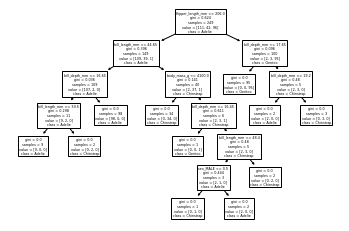

In [46]:
# fig = plt.figure(figsize=(25, 20))

tree_vis = tree.plot_tree(
                clf,
                feature_names = feature_names,
                class_names = target_names,
#                 filled=True
            )

In [ ]:
# save figure
fig.savefig('decision_tree.png')

# Evaluation

In [47]:
prediction = clf.predict(X_test)
prediction

array(['Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'A

In [48]:
y_test

,species
111,Adelie
158,Chinstrap
288,Gentoo
308,Gentoo
185,Chinstrap
134,Adelie
334,Gentoo
...,...
34,Adelie
171,Chinstrap


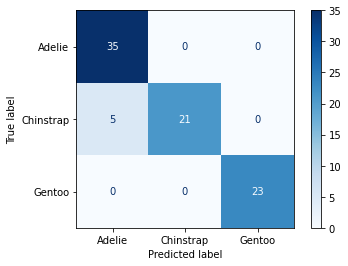

In [49]:
metrics.plot_confusion_matrix(clf, X_test, y_test,
                             display_labels = target_names,
                             cmap = plt.cm.Blues)
plt.show()

In [50]:
# Accuracy Score - exactly right
metrics.accuracy_score(y_test, prediction)

0.9404761904761905

In [51]:
# Precision = TP / (TP + FP)
metrics.precision_score(y_test, prediction, average=None)

array([0.875, 1.   , 1.   ])

In [52]:
# Recall = TP / (TP + FN)
metrics.recall_score(y_test, prediction, average=None)

array([1.        , 0.80769231, 1.        ])

In [53]:
# F1 Score effectively an average precision and recall
# F1 = 2 * ( precision * recall) / (precision + recall)
metrics.f1_score(y_test, prediction, average=None)

array([0.93333333, 0.89361702, 1.        ])